## PROBLEM STATEMENT

**1.** **Airbnb is one of the most popular platforms for booking short-term rentals in Austin, offering a wide variety of accommodations ranging from private rooms to entire homes.**

**2.** **The goal of this project is to predict Airbnb bookings in real-time.**

**3.**  **Here in this project, i developed a model trained on one of the largest open datasets of hotel bookings in Austin, Texas.**

**STEPS INVOLVED IN BUILDING AN ML MODEL FOR THE PROJECT**


**1.** **IMPORTING NECESSARY LIBRARIES FOR PREDICTION.**

**2.** **BASIC EXPLORATION OF DATASET**

**3.** **DEALING WITH MISSING VALUES.**

**4.** **VISUALIZATION OF EACH INDEPENDENT FEATURES AND HOW FEATURES ARE DISTRIBUTED**

**5.** **DEALING WITH SKEWED DATA AND HANDLING OUTLIERS IF POSSIBLE**

**6.** **PERFORMING FEATURE SCALING USING STANDARDSCALER.**

**7.** **SPLITTING THE DATASET AS TRAINING AND TEST VALIDATION.**

**8.** **TRAINING THE DATASET USING ML MODEL.**

**9.** **EVALUATING THE TRAINED ML MODEL WITH TEST DATA USING EVALUATION METRICS TO SEE WHICH MODEL IS BEST FIT.**

**STEP 1.**  **IMPORTING NECESSARY LIBRARIES FOR PREDICTION.**

In [1]:
# IMPORTING NECESSARY LIBRARIES.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# READING THE DATASET USING PANDAS.

df1 = pd.read_csv("listings.csv")
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,329172,"Hillside designer home,10 min.dwntn",1680871,Janet,NaN,78746,30.30085,-97.80794,Entire home/apt,495,3,7,2022-08-07,0.05,1,363,1,NaN
1,329306,"Urban Homestead, 5 minutes to downtown",880571,Angel,NaN,78702,30.27232,-97.72579,Private room,63,2,570,2022-11-30,4.36,5,55,45,NaN
2,331549,One Room with Private Bathroom,1690383,Sandra,NaN,78725,30.23911,-97.58625,Private room,100,2,0,NaN,NaN,1,0,0,NaN
3,333815,Solar Sanctuary - Austin Room,372962,Kim,NaN,78704,30.25381,-97.75262,Private room,102,2,164,2022-10-24,1.26,1,36,18,NaN
4,333442,Rare Secluded 1940s Estate,1698318,Virginia,NaN,78703,30.31267,-97.76641,Entire home/apt,286,3,163,2022-11-12,1.32,1,271,15,NaN


In [3]:
# CREATING A COPY OF DATASET SO THAT ORIGINAL DATASET KEPT SAFE.

df = df1.copy()

**STEP 2.**  **BASIC EXPLORATION OF DATASET.**

In [4]:
# VIEWING COLUMNS OF THE DATASET.

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
# VIEWING TOP 5 RECORDS OF THE DATASET.

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,329172,"Hillside designer home,10 min.dwntn",1680871,Janet,NaN,78746,30.30085,-97.80794,Entire home/apt,495,3,7,2022-08-07,0.05,1,363,1,NaN
1,329306,"Urban Homestead, 5 minutes to downtown",880571,Angel,NaN,78702,30.27232,-97.72579,Private room,63,2,570,2022-11-30,4.36,5,55,45,NaN
2,331549,One Room with Private Bathroom,1690383,Sandra,NaN,78725,30.23911,-97.58625,Private room,100,2,0,NaN,NaN,1,0,0,NaN
3,333815,Solar Sanctuary - Austin Room,372962,Kim,NaN,78704,30.25381,-97.75262,Private room,102,2,164,2022-10-24,1.26,1,36,18,NaN
4,333442,Rare Secluded 1940s Estate,1698318,Virginia,NaN,78703,30.31267,-97.76641,Entire home/apt,286,3,163,2022-11-12,1.32,1,271,15,NaN


In [6]:
# VIEWING SHAPE OF THE DATASET.

df.shape

(13808, 18)

In [7]:
# CHECKING UNIQUE VALUES IN THE DATASET.

df.nunique()

id                                13808
name                              13445
host_id                            8294
host_name                          3246
neighbourhood_group                   0
neighbourhood                        44
latitude                          10080
longitude                          9518
room_type                             4
price                               964
minimum_nights                       60
number_of_reviews                   469
last_review                        1342
reviews_per_month                   803
calculated_host_listings_count       49
availability_365                    366
number_of_reviews_ltm               137
license                               0
dtype: int64

In [8]:
# CHECKING THE DATASET IF NULL VALUES ARE PRESENT IN EACH COLUMNS OR NOT.

df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               13808
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2860
reviews_per_month                  2860
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           13808
dtype: int64

**HERE FROM ABOVE CODE WE CAN SEE THAT THERE ARE SOME NaN VALUES PRESENT IN EACH COLUMN. IT SHOULD BE TREATED WITH NECESSARY IMPUTATION TECHNIQUE.**

In [10]:
# PERFORMING STATISTICAL CALCULATION ON ALL COLUMNS.

df.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.380800e+04,13808,1.380800e+04,13806,0.0,13808.000000,13808.000000,13808.000000,13808,13808.000000,13808.000000,13808.000000,10948,10948.000000,13808.000000,13808.000000,13808.000000,0.0
unique,NaN,13445,NaN,3246,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1342,NaN,NaN,NaN,NaN,NaN
top,NaN,Stylish 1BR Near UT | Highland | Evonify,NaN,Landing,NaN,NaN,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-11-13,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,150,NaN,NaN,NaN,NaN,11306,NaN,NaN,NaN,497,NaN,NaN,NaN,NaN,NaN
mean,2.179221e+17,NaN,1.306572e+08,NaN,NaN,78724.506373,30.281656,-97.750616,NaN,279.450753,7.686631,35.263905,NaN,1.603619,11.594148,154.425985,10.683444,NaN
std,3.179150e+17,NaN,1.450757e+08,NaN,NaN,20.718885,0.064654,0.062743,NaN,1344.531412,24.929269,76.308419,NaN,1.802300,25.941273,140.104042,18.293831,NaN
min,5.456000e+03,NaN,2.300000e+01,NaN,NaN,78701.000000,30.078870,-98.056630,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.273535e+07,NaN,1.562121e+07,NaN,NaN,78704.000000,30.242189,-97.769575,NaN,89.000000,1.000000,1.000000,NaN,0.290000,1.000000,0.000000,0.000000,NaN
50%,4.772066e+07,NaN,6.292611e+07,NaN,NaN,78723.000000,30.269575,-97.741913,NaN,145.000000,2.000000,7.000000,NaN,1.000000,2.000000,114.000000,2.000000,NaN
75%,6.108598e+17,NaN,2.171957e+08,NaN,NaN,78745.000000,30.309210,-97.717300,NaN,255.250000,3.000000,33.000000,NaN,2.340000,6.000000,312.000000,14.000000,NaN


**STEP 3.** **DEALING WITH MISSING VALUES.**

**1.** **HERE FROM ABOVE STATISTICAL CALCULATION, WE CAN SEE THAT THERE ARE MANY NaN VALUES AND 0 VALUES ARE PRESENT IN SOME COLUMNS.**

**2.** **0 IN SOME COLUMNS ALSO REPRESENTS THAT THERE ARE SOME MISSING VALUES TOO. SO THE VALUES ARE WRONGLY IMPUTED AS 0.**

**3.** **WE NEED TO REPLACE 0 WITH NaN VALUES FOR FURTHUR EVALUATION.**

In [11]:
# REPLACING '0' WITH 'NaN' FOR FURTHUR EVALUATION.

df.replace(0, np.nan, inplace=True)

In [12]:
# DROPPING UNWANTED COLUMNS FROM THE DATASET.

df.drop('last_review', axis=1, inplace=True)

In [13]:
# DROPPING DUPLICATE VALUES FROM EACH AND EVERY COLUMN.

df.drop_duplicates(inplace=True)

In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,329172,"Hillside designer home,10 min.dwntn",1680871,Janet,NaN,78746,30.30085,-97.80794,Entire home/apt,495.0,3,7.0,0.05,1,363.0,1.0,NaN
1,329306,"Urban Homestead, 5 minutes to downtown",880571,Angel,NaN,78702,30.27232,-97.72579,Private room,63.0,2,570.0,4.36,5,55.0,45.0,NaN
2,331549,One Room with Private Bathroom,1690383,Sandra,NaN,78725,30.23911,-97.58625,Private room,100.0,2,NaN,NaN,1,NaN,NaN,NaN
3,333815,Solar Sanctuary - Austin Room,372962,Kim,NaN,78704,30.25381,-97.75262,Private room,102.0,2,164.0,1.26,1,36.0,18.0,NaN
4,333442,Rare Secluded 1940s Estate,1698318,Virginia,NaN,78703,30.31267,-97.76641,Entire home/apt,286.0,3,163.0,1.32,1,271.0,15.0,NaN


In [16]:
# DROPPING NULL VALUES ON PRICE COLUMN SINCE IT HAS ONLY 2 NaN VALUES.

df.dropna(subset = ['price'], inplace=True)

In [17]:
## PERFORMING LABEL ENCODING ON 'room_type' COLUMN TO CHANGE OBJECT TO INT64 TYPE.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['room_type_LabelEncoded'] = le.fit_transform(df['room_type'])

In [18]:
# DROPPING ORIGINAL COLUMN. 

df.drop('room_type', axis=1, inplace = True)

In [19]:
# RENAMING ENCODED COLUMN TO ORIGINAL COLUMN NAME.

df.rename(columns = {'room_type_LabelEncoded' : 'room_type'}, inplace=True)

In [20]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,room_type
0,329172,"Hillside designer home,10 min.dwntn",1680871,Janet,NaN,78746,30.30085,-97.80794,495.0,3,7.0,0.05,1,363.0,1.0,NaN,0
1,329306,"Urban Homestead, 5 minutes to downtown",880571,Angel,NaN,78702,30.27232,-97.72579,63.0,2,570.0,4.36,5,55.0,45.0,NaN,2
2,331549,One Room with Private Bathroom,1690383,Sandra,NaN,78725,30.23911,-97.58625,100.0,2,NaN,NaN,1,NaN,NaN,NaN,2
3,333815,Solar Sanctuary - Austin Room,372962,Kim,NaN,78704,30.25381,-97.75262,102.0,2,164.0,1.26,1,36.0,18.0,NaN,2
4,333442,Rare Secluded 1940s Estate,1698318,Virginia,NaN,78703,30.31267,-97.76641,286.0,3,163.0,1.32,1,271.0,15.0,NaN,0


In [21]:
# AGAIN DROPPING UNWANTED COLUMNS FROM DATASET

df.drop(columns = ['name', 'host_name'], inplace=True)

In [22]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,room_type
0,329172,1680871,NaN,78746,30.30085,-97.80794,495.0,3,7.0,0.05,1,363.0,1.0,NaN,0
1,329306,880571,NaN,78702,30.27232,-97.72579,63.0,2,570.0,4.36,5,55.0,45.0,NaN,2
2,331549,1690383,NaN,78725,30.23911,-97.58625,100.0,2,NaN,NaN,1,NaN,NaN,NaN,2
3,333815,372962,NaN,78704,30.25381,-97.75262,102.0,2,164.0,1.26,1,36.0,18.0,NaN,2
4,333442,1698318,NaN,78703,30.31267,-97.76641,286.0,3,163.0,1.32,1,271.0,15.0,NaN,0


In [23]:
df.drop('neighbourhood_group', axis=1, inplace=True)

In [24]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,room_type
0,329172,1680871,78746,30.30085,-97.80794,495.0,3,7.0,0.05,1,363.0,1.0,NaN,0
1,329306,880571,78702,30.27232,-97.72579,63.0,2,570.0,4.36,5,55.0,45.0,NaN,2
2,331549,1690383,78725,30.23911,-97.58625,100.0,2,NaN,NaN,1,NaN,NaN,NaN,2
3,333815,372962,78704,30.25381,-97.75262,102.0,2,164.0,1.26,1,36.0,18.0,NaN,2
4,333442,1698318,78703,30.31267,-97.76641,286.0,3,163.0,1.32,1,271.0,15.0,NaN,0


In [38]:
# AGAIN CHECKING NULL VALUES IN EACH COLUMNS.

df.isnull().sum()

id                       0
host_id                  0
neighbourhood            0
latitude                 0
longitude                0
price                    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_365         0
number_of_reviews_ltm    0
room_type                0
dtype: int64

In [26]:
# FIRST IMPUTING MEDIAN VALUES OF A PARTICULAR COLUMN.

median = df['number_of_reviews'].median()

In [27]:
df['number_of_reviews'] = df['number_of_reviews'].fillna(median)

In [28]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,room_type
0,329172,1680871,78746,30.30085,-97.80794,495.0,3,7.0,0.05,1,363.0,1.0,NaN,0
1,329306,880571,78702,30.27232,-97.72579,63.0,2,570.0,4.36,5,55.0,45.0,NaN,2
2,331549,1690383,78725,30.23911,-97.58625,100.0,2,14.0,NaN,1,NaN,NaN,NaN,2
3,333815,372962,78704,30.25381,-97.75262,102.0,2,164.0,1.26,1,36.0,18.0,NaN,2
4,333442,1698318,78703,30.31267,-97.76641,286.0,3,163.0,1.32,1,271.0,15.0,NaN,0


In [29]:
# PERFORMING MEDIAN IMPUTATION ON 'reviews_per_month' COLUMN.

median = df['reviews_per_month'].median()

In [30]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(median)

In [31]:
mean = df['availability_365'].mean()

In [32]:
df['availability_365'] = df['availability_365'].fillna(mean)

<Axes: xlabel='availability_365', ylabel='Count'>

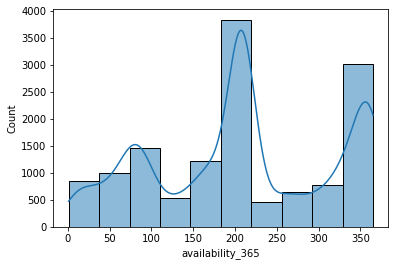

In [ ]:
sns.histplot(data=df['availability_365'], kde=True, bins=10)

<Axes: xlabel='number_of_reviews_ltm', ylabel='Count'>

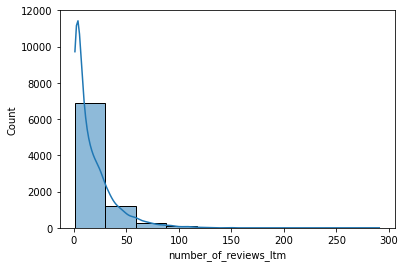

In [ ]:
sns.histplot(data=df['number_of_reviews_ltm'], kde=True, bins=10)

In [34]:
# PERFORMING MEDIAN IMPUTATION ON 'number_of_reviews_ltm' COLUMN.

median = df['number_of_reviews_ltm'].median()

In [35]:
df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].fillna(median)

In [36]:
df.drop('calculated_host_listings_count', axis=1, inplace=True)

In [ ]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,license,room_type
0,329172,1680871,78746,30.30085,-97.80794,495.0,3,7.0,0.05,363.000000,1.0,NaN,0
1,329306,880571,78702,30.27232,-97.72579,63.0,2,570.0,4.36,55.000000,45.0,NaN,2
2,331549,1690383,78725,30.23911,-97.58625,100.0,2,14.0,1.00,207.726644,10.0,NaN,2
3,333815,372962,78704,30.25381,-97.75262,102.0,2,164.0,1.26,36.000000,18.0,NaN,2
4,333442,1698318,78703,30.31267,-97.76641,286.0,3,163.0,1.32,271.000000,15.0,NaN,0


In [37]:
# DROPPING UNWANTED COLUMNS FROM THE DATASET.

df.drop('license', axis=1, inplace=True)

<Axes: xlabel='number_of_reviews_ltm', ylabel='Count'>

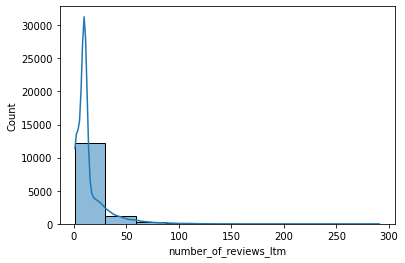

In [ ]:
sns.histplot(data=df['number_of_reviews_ltm'], kde=True, bins=10)

In [ ]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,room_type
0,329172,1680871,78746,30.30085,-97.80794,495.0,3,7.0,0.05,363.000000,1.0,0
1,329306,880571,78702,30.27232,-97.72579,63.0,2,570.0,4.36,55.000000,45.0,2
2,331549,1690383,78725,30.23911,-97.58625,100.0,2,14.0,1.00,207.726644,10.0,2
3,333815,372962,78704,30.25381,-97.75262,102.0,2,164.0,1.26,36.000000,18.0,2
4,333442,1698318,78703,30.31267,-97.76641,286.0,3,163.0,1.32,271.000000,15.0,0


**STEP 4.** **VISUALIZATION OF EACH INDEPENDENT FEATURES AND HOW FEATURES ARE DISTRIBUTED.**

In [39]:
# CREATING COPY OF DATASET.

df1 = df.copy()

<Axes: >

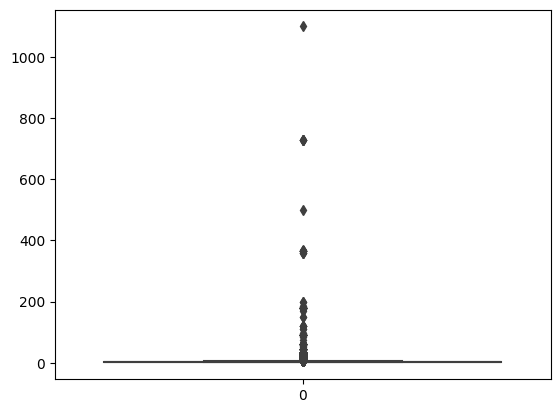

In [40]:
# VISUALIZING 'minimum_nights' COLUMN USING BOXPLOT.

sns.boxplot(data=df1['minimum_nights'])

**IN THIS COLUMN, 'minimum_nights', WE CAN CLEARLY SEE THAT OUTLIERS ARE PRESENT. IT NEEDS TO BE HANDLED WITH APPROPRIATE OUTLIER ANALYSIS TECHNIQUE.**

<Axes: >

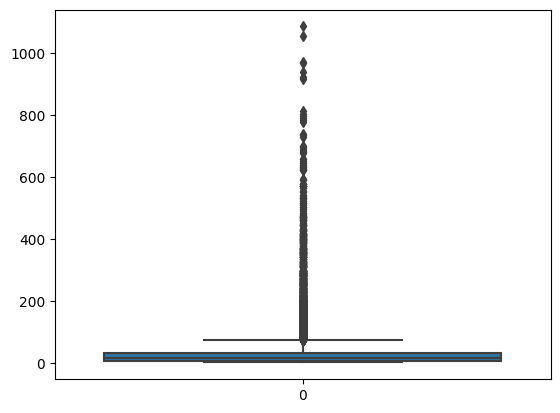

In [41]:
# VISUALIZING 'number_of_reviews' COLUMN USING BOXPLOT.

sns.boxplot(data=df1['number_of_reviews'])

**IN THIS COLUMN, 'number_of_reviews', WE CAN CLEARLY SEE THAT OUTLIERS ARE PRESENT. IT NEEDS TO BE HANDLED WITH APPROPRIATE OUTLIER ANALYSIS TECHNIQUE.**

<Axes: >

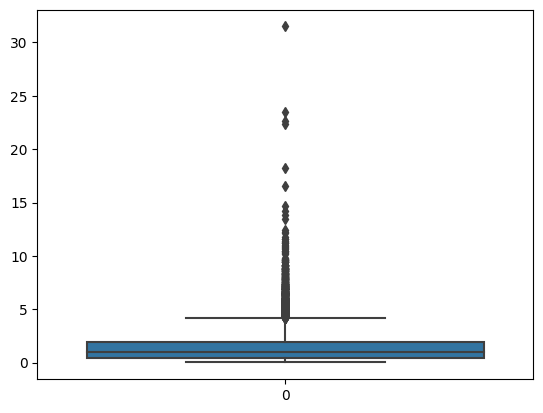

In [42]:
# VISUALIZING 'reviews_per_monmth' COLUMN USING BOXPLOT.

sns.boxplot(data=df1['reviews_per_month'])

**IN THIS COLUMN, 'reviews_per_month', WE CAN CLEARLY SEE THAT OUTLIERS ARE PRESENT. IT NEEDS TO BE HANDLED WITH APPROPRIATE OUTLIER ANALYSIS TECHNIQUE.**

<Axes: >

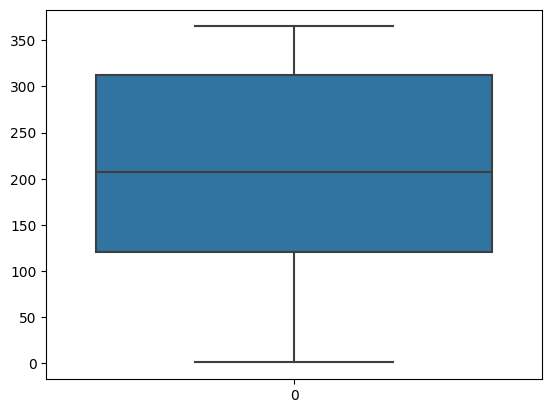

In [43]:
# VISUALIZING 'availability_365' COLUMN USING BOXPLOT

sns.boxplot(data=df1['availability_365'])

<Axes: >

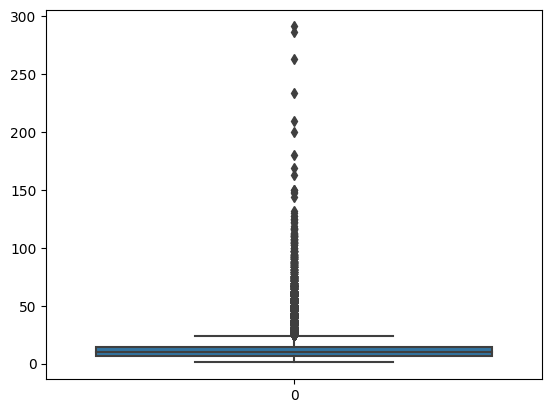

In [44]:
# VISUALIZING 'number_of_reviews_ltm' COLUMN USING BOXPLOT

sns.boxplot(data=df1['number_of_reviews_ltm'])

**1. FROM ALL THE ABOVE COLUMNS WE CAN CLEARLY SEE THAT THERE ARE MANY OUTLIERS PRESENT.**

**2. WE CAN DO EITHER ONE THINGS. EITHER WE CAN USE OUTLIER ANALYSIS OR WE CAN USE TRANSFORMATION TECHNIQUES SINCE IF OUTLIERS ARE PRESENT THEN FOR SURE SKEWNESS WILL BE THERE.**

**2. HERE IAM USING BOTH NECESSARY OUTLIER ANALYSIS SUCH AS IQR (INTER QUARTILE RANGE) OR Z-SCORE AND TRANSFORMATION TECHNIQUE LIKE LOG TRANSFORMATION ON SOME VARIABLES.**

In [46]:
# Performing the IQR of the 'minimum_nights' column

Q1 = df1['minimum_nights'].quantile(0.25)
Q3 = df1['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
lower_range = Q1 - 1.5*IQR
upper_range = Q3 + 1.5*IQR
outliers = df1[(df1['minimum_nights'] < lower_range) | (df1['minimum_nights'] > upper_range)]

# Make changes in the existing dataset
df1 = df1.drop(outliers.index)

# Save the changes
df1.to_csv('listings.csv', index=False)

<Axes: xlabel='minimum_nights', ylabel='Count'>

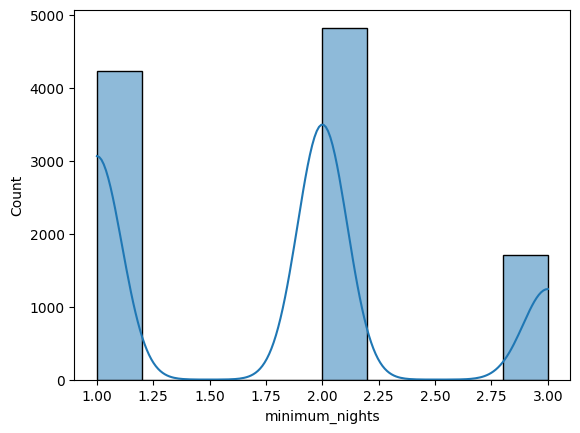

In [47]:
# CHECKING HISTOGRAM PLOT FOR 'minimum_nights' COLUMN.

sns.histplot(data=df1['minimum_nights'], kde=True,bins=10)

**HERE WE CAN SEE THAT 'minimum_nights' COLUMN NOW BECOMES NORMALLY DISTRIBUTED AFTER PERFORMING IQR.**

<Axes: >

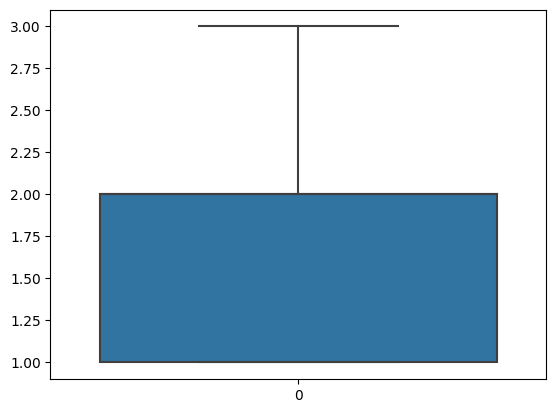

In [48]:
# VISUALIZING BOXPLOT ON 'minimum_nights' COLUMN.

sns.boxplot(data=df1['minimum_nights'])

**HERE WE CAN SEE THAT OUTLIERS OF 'minimum_nights' COLUMN HAS BEEN PERFORMED.**

In [49]:
# performing the IQR of the 'number_of_reviews' column

Q1 = df1['number_of_reviews'].quantile(0.25)
Q3 = df1['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
lower_range = Q1 - 1.5*IQR
upper_range = Q3 + 1.5*IQR
outliers = df1[(df1['number_of_reviews'] < lower_range) | (df1['number_of_reviews'] > upper_range)]

# Make changes in the existing dataset
df1 = df1.drop(outliers.index)

# Save the changes
df1.to_csv('listings.csv', index=False)

<Axes: xlabel='number_of_reviews', ylabel='Count'>

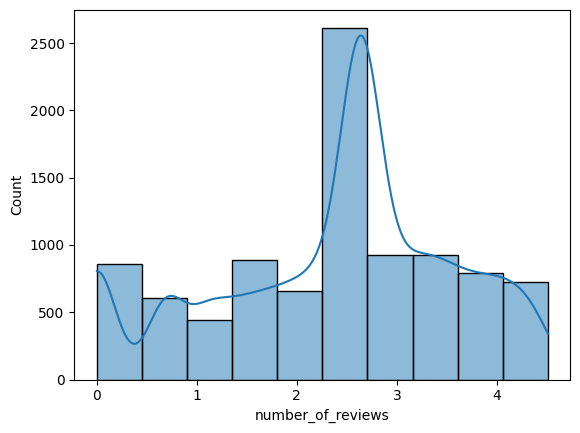

In [52]:
# VISUALIZING 'number_of_reviews' COLUMN USING HISTOGRAM.

sns.histplot(data=df1['number_of_reviews'], kde=True,bins=10)

**HERE THE ABOVE HSITOGRAM PLOT CLEARLY GIVES NORMAL DISTRIBUTION OF VARIABLE AFTER PERFORMING BOTH IQR AND LOG TRANSFORMATION.**

<Axes: >

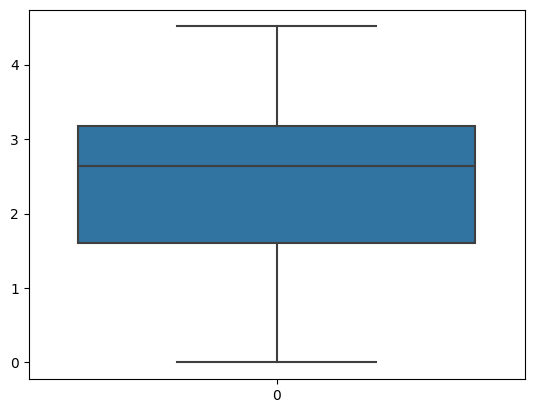

In [53]:
# VISUALIZING 'number_of_reviews' using boxplot

sns.boxplot(data=df1['number_of_reviews'])

**HERE WE CAN SEE THAT OUTLIERS OF 'number_of_reviews' COLUMN HAS BEEN PERFORMED.**

In [51]:
# performing LOG TRANSFORMATION on 'number_of_reviews'.

df1['number_of_reviews'] = np.log(df1['number_of_reviews'])

In [71]:
# performing the IQR of the 'reviews_per_month' column

Q1 = df1['reviews_per_month'].quantile(0.25)
Q3 = df1['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
lower_range = Q1 - 1.5*IQR
upper_range = Q3 + 1.5*IQR
outliers = df1[(df1['reviews_per_month'] < lower_range) | (df1['reviews_per_month'] > upper_range)]

# Make changes in the existing dataset
df1 = df1.drop(outliers.index)

# Save the changes
df1.to_csv('listings.csv', index=False)

<Axes: xlabel='reviews_per_month', ylabel='Count'>

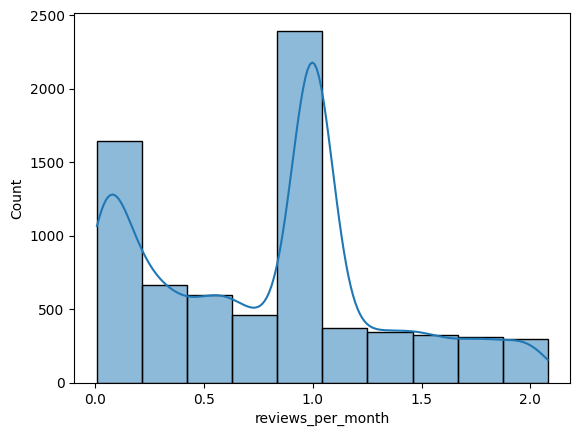

In [72]:
# VISUALIZING 'reviews_per_month' COLUMN USING HISTOGRAM.

sns.histplot(data=df1['reviews_per_month'], kde=True,bins=10)

**HERE THE VARIABLE BECOMES NORMALLY DISTRIBUTED TO SOME EXTEND.**

<Axes: >

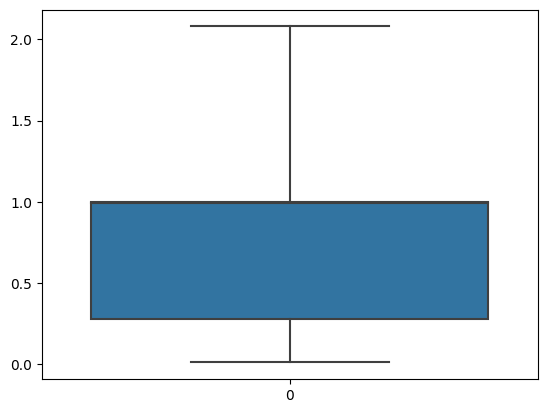

In [73]:
# VISUALIZING 'reviews_per_month' COLUMN USING BOXPLOT.

sns.boxplot(data=df1['reviews_per_month'])

**HERE WE CAN SEE THAT OUTLIERS OF 'reviews_per_month' COLUMN HAS BEEN PERFORMED.**

In [74]:
# Calculate the IQR of the 'number_of_reviews_ltm' column

Q1 = df1['number_of_reviews_ltm'].quantile(0.25)
Q3 = df1['number_of_reviews_ltm'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
lower_range = Q1 - 1.5*IQR
upper_range = Q3 + 1.5*IQR
outliers = df1[(df1['number_of_reviews_ltm'] < lower_range) | (df1['number_of_reviews_ltm'] > upper_range)]

# Make changes in the existing dataset
df1 = df1.drop(outliers.index)

# Save the changes
df1.to_csv('listings.csv', index=False)

<Axes: xlabel='number_of_reviews_ltm', ylabel='Count'>

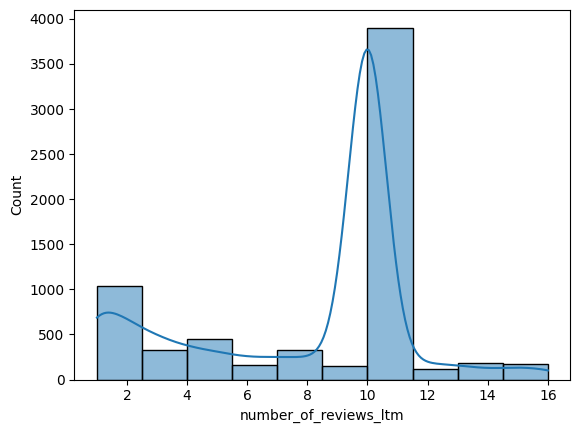

In [75]:
# VISUALIZING 'number_of_reviews_ltm' COLUMN USING HISTOGRAM.

sns.histplot(data=df1['number_of_reviews_ltm'], kde=True, bins=10)

**HERE THE VARIABLE BECOMES NORMALLY DISTRIBUTED TO SOME EXTEND.**

<Axes: >

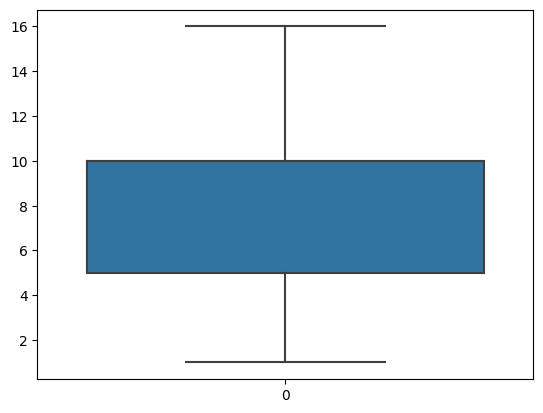

In [76]:
# visualizing 'number_of_reviews_ltm' column using boxplot

sns.boxplot(data=df1['number_of_reviews_ltm'])

**HERE WE CAN SEE THAT OUTLIERS OF 'number_of_reviews_ltm' COLUMN HAS BEEN PERFORMED.**

<Axes: xlabel='latitude', ylabel='Count'>

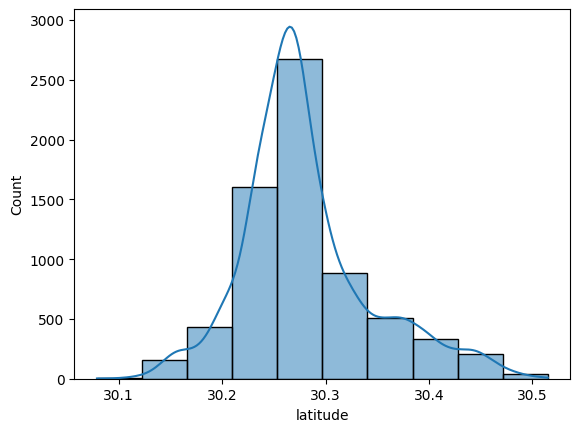

In [77]:
# VISUALIZING 'latitude' USING HISTOGRAM.

sns.histplot(data=df1['latitude'], kde=True, bins=10)

<Axes: xlabel='longitude', ylabel='Count'>

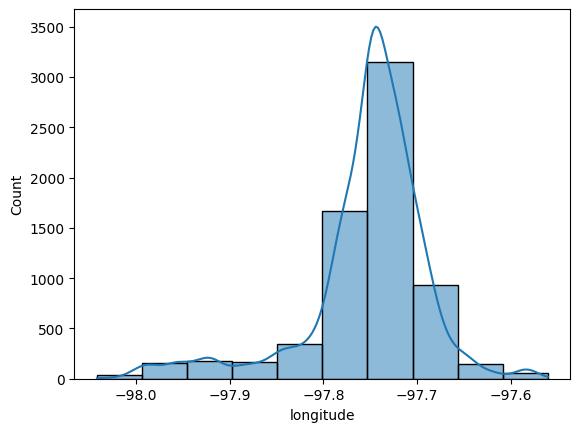

In [78]:
# VISUALIZING 'longitude' COLUMN USING HISTOGRAM.

sns.histplot(data=df1['longitude'], kde=True, bins=10)

**STEP 6.** **PERFORMING FEATURE SCALING USING STANDARDSCALER.**


**1.** **StandardScaler is a data preprocessing technique used to standardize the features of a dataset by transforming them to have zero mean and unit variance.**

**2.** **This technique is often used in machine learning algorithms to improve model performance and to facilitate comparisons between different features.**

**3.** **StandardScaler is typically applied to continuous numerical data. It helps to ensure that each feature contributes equally to the model, and that the magnitude of the features does not influence the model's performance.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the features you want to scale
features_to_scale = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply StandardScaler to the selected features
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the features you want to scale
features_to_scale = ['number_of_reviews_ltm']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply StandardScaler to the selected features
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

**STEP 7.**  **SPLITTING THE DATASET AS TRAINING AND TEST VALIDATION.**

In [ ]:
X = df1[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm', 'availability_365']]
y = df1['price']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state=10)

**STEP 8.** **TRAINING THE DATASET USING ML MODEL.**

**1.** **HERE IN THIS PROJECT I HAVE IMPLEMENTED LINEAR REGRESSION ALGORITHM TO PREDICT PRICE OF AIRBNB HOTEL BOOKING IN REAL TIME.**

**2.** **SINCE LINEAR REGRESSION IS ONE OF THE ML MODEL WHICH IS USED FOR FINDING RELATIONSHIP BETWEEN CONTINUOUS VARIABLES.**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object and fit it to the training data
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

y1_pred = regressor.predict(X1_test)

y1_pred

array([341.02785468, 326.82758626, 368.31377349, ..., 467.07808263,
       408.90586299,  30.56700622])

**STEP 9.** **EVALUATING THE TRAINED ML MODEL WITH TEST DATA USING EVALUATION METRICS TO SEE WHICH MODEL IS BEST FIT.**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y1_test, y1_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  360882.6049940929
Root Mean Squared Error:  600.7350539082041
Mean Absolute Error:  281.0266583741986


**1. HERE I HAVE USED 3 EVALUATION METRICS TO FIND WHICH ONE BEST FITS THE ML MODEL.**

**2.** **FROM THE 3 EVALUATION METRICS, WE SHOULD CONSIDER RMSE AS BEST FIT MODEL OUT OF REST OF 2 EVALUATION MODELS MSE AND MAE.**

**3.** **THE REASON FOR CHOOSING RMSE AS BEST FIT MODEL IS BECAUSE RMSE IS MORE INTERPRETABLE IN THE CONTEXT OF THE TARGET VARIABLE, WHICH IS THE PRICE IN THIS CASE.** 

**4. RMSE WILL GIVE YOU AN ESTIMATE OF HOW MUCH THE PREDICTED PRICES ARE OFF ON AVERAGE, IN THE SAME UNIT AS THE TARGET VARIABLE(i.e., IN DOLLARS, EUROS, OR ANY OTHER CURRENCY).**